In [299]:
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

In [300]:
folder_path = 'final_etf_csv'
merged_df = pd.DataFrame()

In [301]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

for file in csv_files:
    etf_name = os.path.splitext(os.path.basename(file))[0]
    
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    
    if 'Price' in df.columns:
        merged_df[etf_name] = df['Price']

merged_df.index = pd.to_datetime(merged_df.index)


Reversing

In [303]:
merged_df = merged_df.iloc[::-1]

In [304]:
merged_df.head()

,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
Date,,,,,,,
2004-11-08,857.404236,NaN,133.8503,920.85,133.4091,109.725293,114.269319
2004-11-09,857.429099,NaN,134.0579,922.40,133.6256,109.885012,114.340659
2004-11-10,857.135546,NaN,134.1118,921.94,133.6821,109.672180,114.458908
2004-11-11,861.981622,NaN,134.4617,920.77,134.0548,109.660350,114.432164
2004-11-12,865.451387,NaN,134.7325,926.08,134.3564,109.566189,114.367007


In [305]:
def plot_each(merged_df):
    for etf_name in merged_df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_df.index, merged_df[etf_name], label=etf_name)
        plt.title(f"Price Time Series for {etf_name}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()


## Plotting For Each Asset For Good Measure

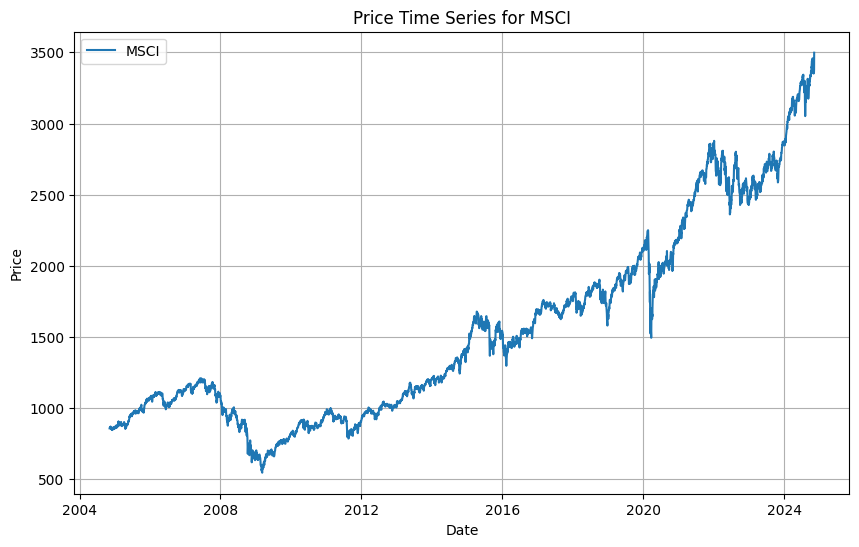

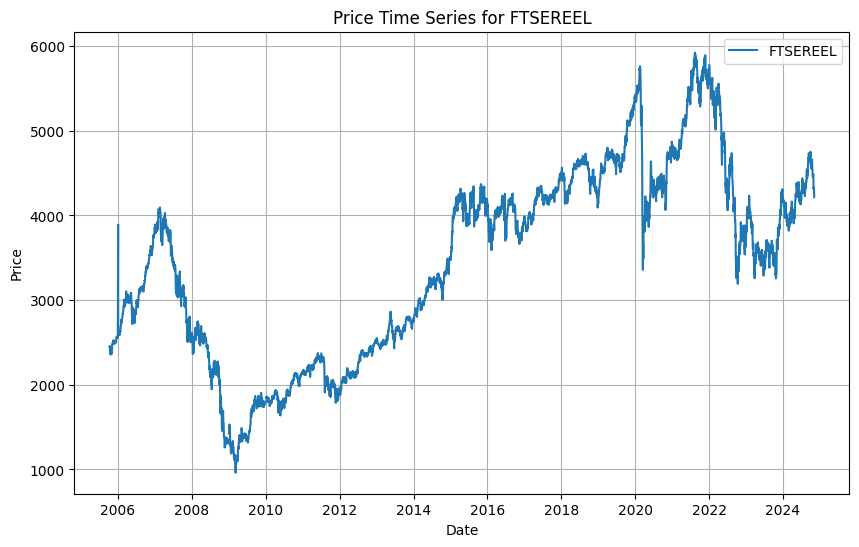

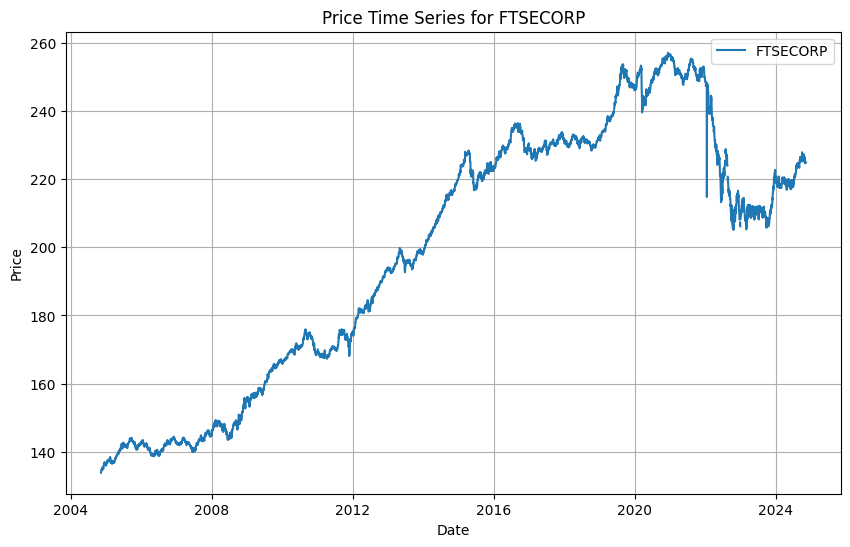

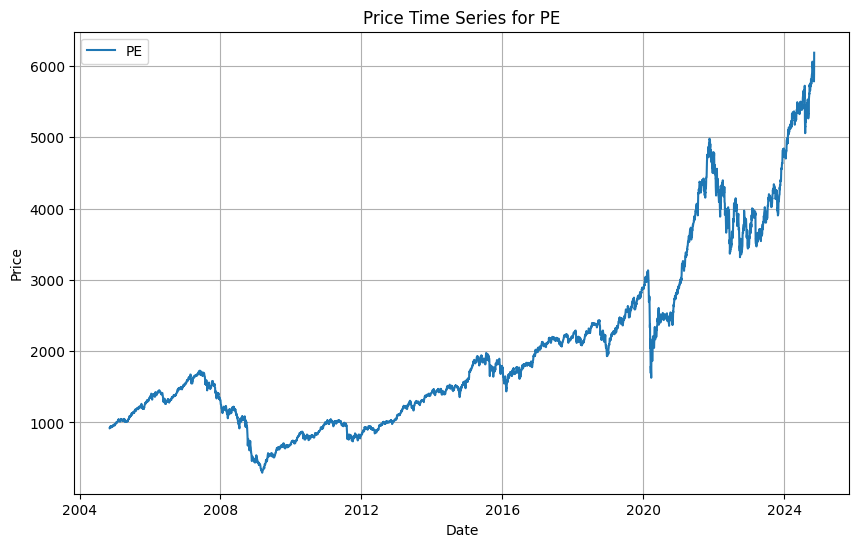

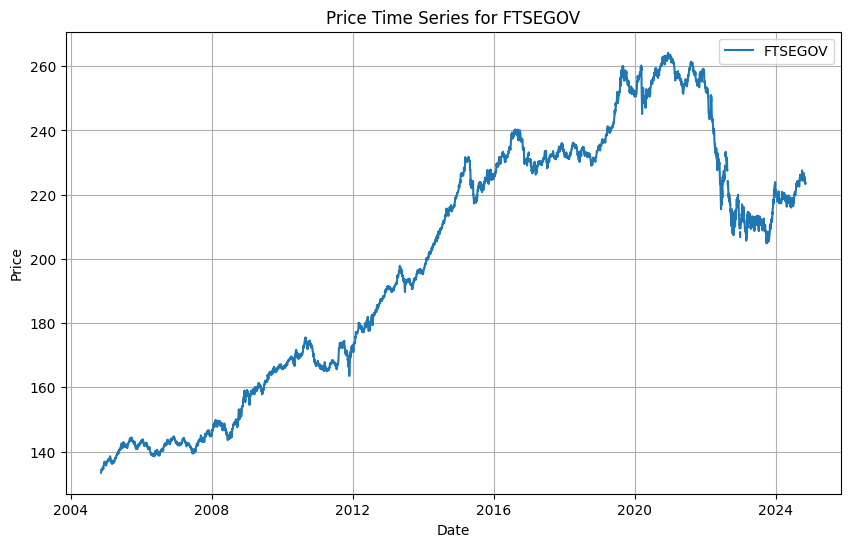

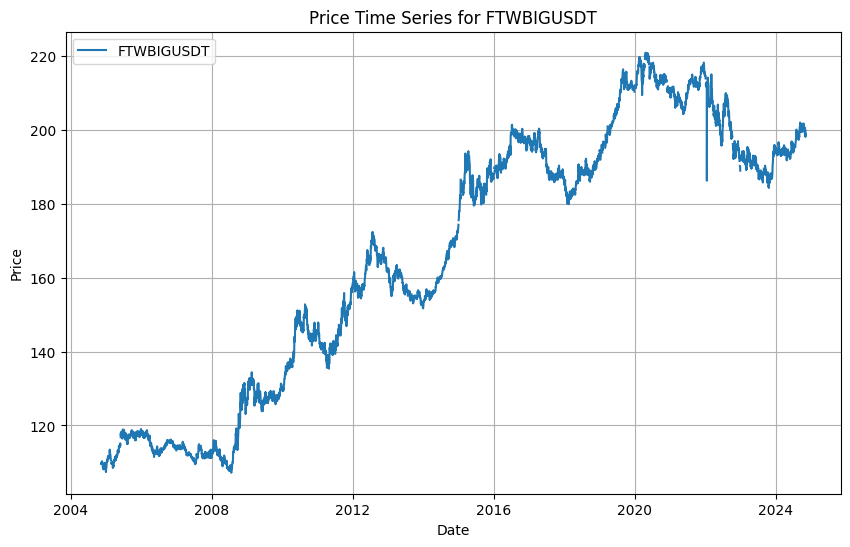

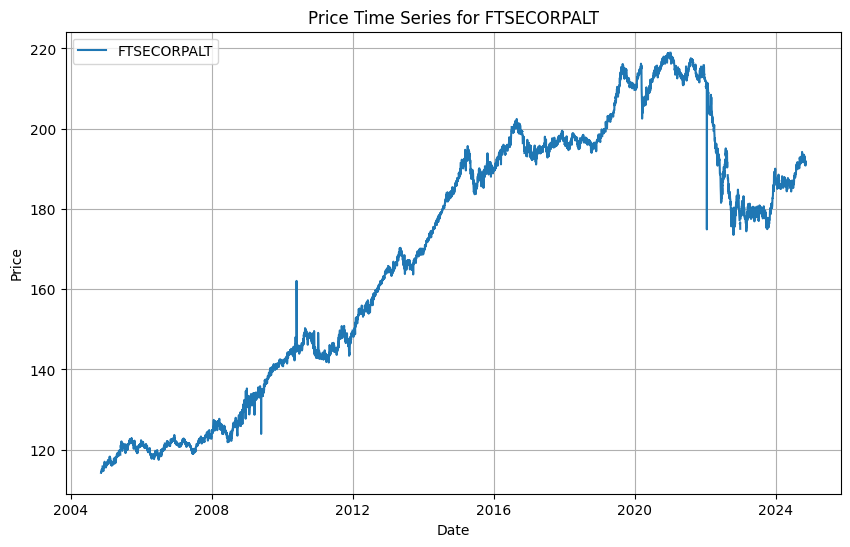

In [306]:
plot_each(merged_df)

## Plotting Everything Together

In [307]:
def all_in_one_plot(df):
    plt.figure(figsize=(12, 8))

    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    plt.title('Time Series of Various Financial Indicators')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.legend(loc="best")

    plt.show()

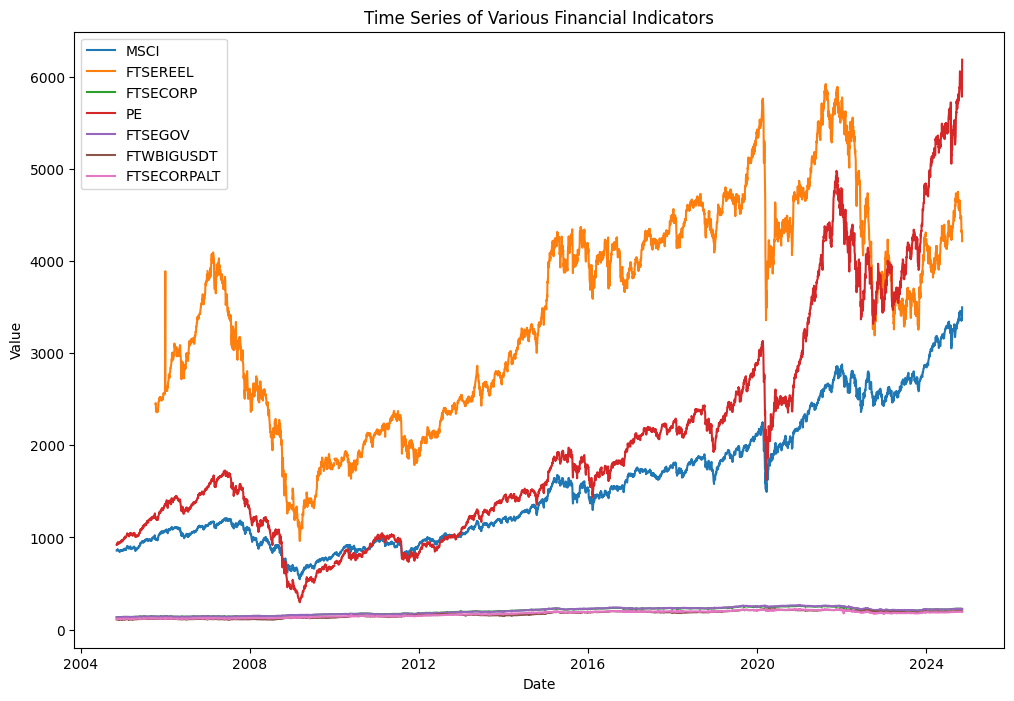

In [308]:
all_in_one_plot(merged_df)

In [309]:
# Find the earliest date where there is data in all columns (no NaNs)
earliest_date_with_data = merged_df.dropna().index.min()

# Filter the DataFrame to keep only rows from this earliest date onwards
merged_df = merged_df[merged_df.index >= earliest_date_with_data]

# Display the earliest date with complete data and the filtered DataFrame
print(f"Earliest date with complete data: {earliest_date_with_data}")
merged_df.head()


Earliest date with complete data: 2005-10-10 00:00:00


,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
Date,,,,,,,
2005-10-10,984.506874,2450.95,143.1196,1214.67,143.3913,117.381192,121.629187
2005-10-11,991.444822,2458.87,142.8820,1222.97,143.1166,117.792392,121.730265
2005-10-12,983.748013,2450.14,142.6786,1211.16,142.8919,117.413956,121.577182
2005-10-13,976.091490,2404.57,142.2951,1198.21,142.4543,116.663077,120.237076
2005-10-14,980.342627,2385.68,142.3027,1200.09,142.4629,116.810375,121.130852


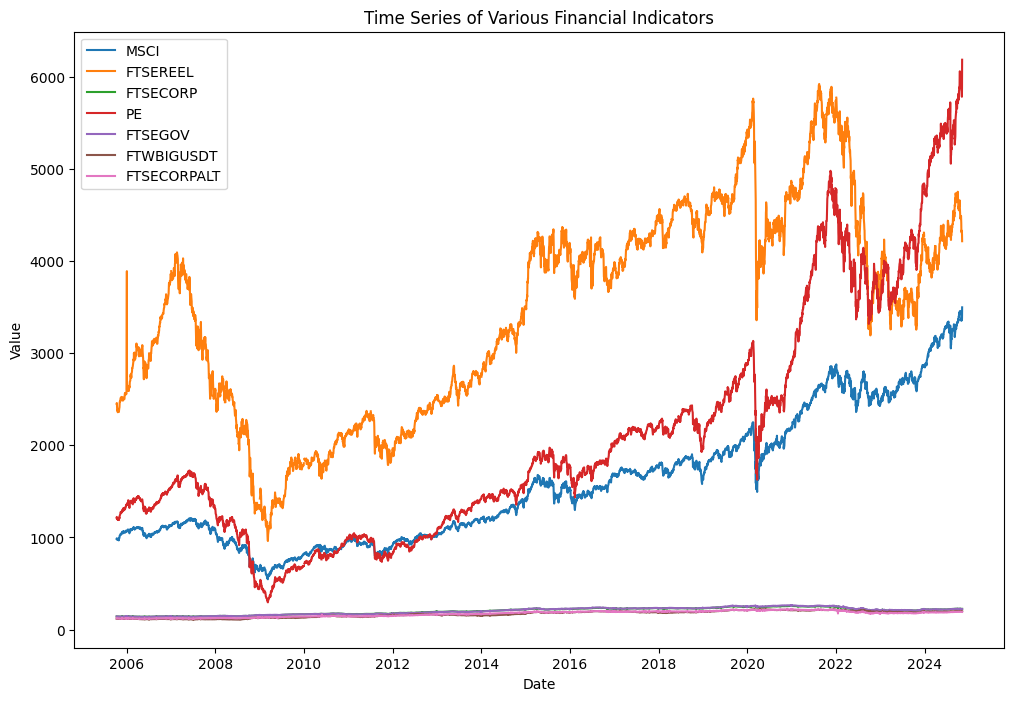

In [310]:
all_in_one_plot(merged_df)

In [311]:
starting_values = merged_df.iloc[0]

# Normalize each column by dividing all values by the starting value of that column
normalized_df = merged_df / starting_values

# Display the normalized DataFrame
print("Normalized DataFrame:")
normalized_df.head()

Normalized DataFrame:


,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
Date,,,,,,,
2005-10-10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2005-10-11,1.007047,1.003231,0.998340,1.006833,0.998084,1.003503,1.000831
2005-10-12,0.999229,0.999670,0.996919,0.997110,0.996517,1.000279,0.999572
2005-10-13,0.991452,0.981077,0.994239,0.986449,0.993465,0.993882,0.988554
2005-10-14,0.995770,0.973370,0.994292,0.987997,0.993525,0.995137,0.995903


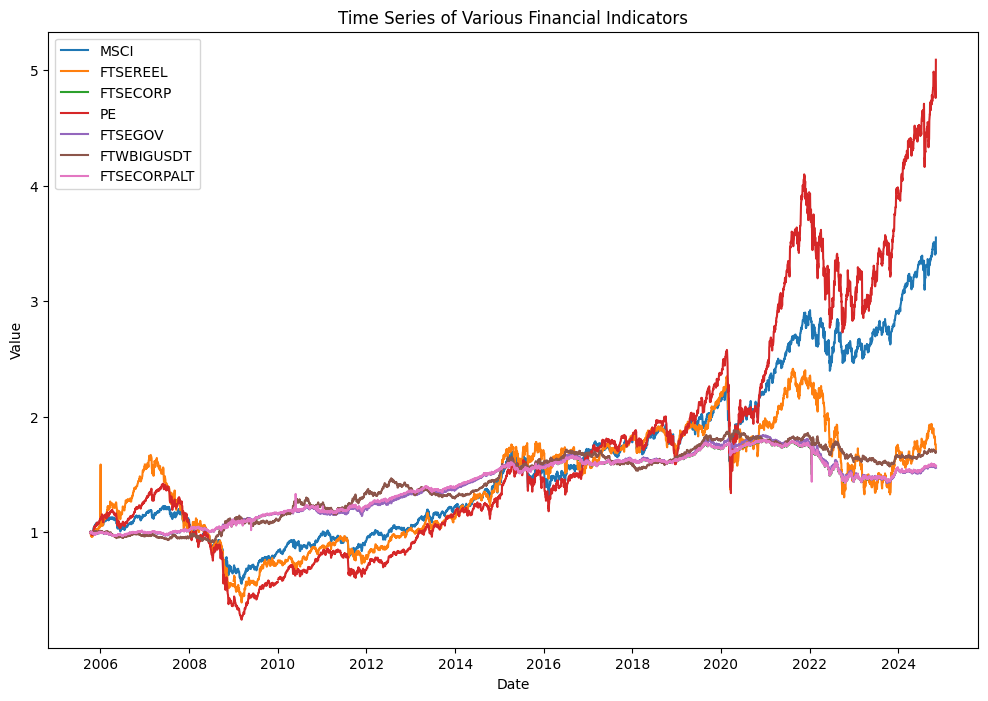

In [312]:
all_in_one_plot(normalized_df)

## We Have Made The Data --> Converting To Csv

In [313]:
normalized_df.to_csv('final_asset_classes.csv', index=True)